# Permutation Test

In [65]:
suppressPackageStartupMessages({
  library(knitr)
  library(readr)
  library(tidyverse)
  library(car)
})

### Objective
The contemporary Philippine political landscape is abundant of popular media personalities who leverage their fame for electoral advantage. Awards not only reflect artistic caliber, but may also function as markers for an actor's public recognition and perceived credibility. 

To explore whether awards correlate with electoral success, we seek to determine whether the number of acting awards is the same for actors who have been elected to office and those who have not.

### The Data

The dataset consists of 30 actors: 12 elected politicians and 18 non-politicians.

In [66]:
actors <- read_csv("https://raw.githubusercontent.com/zkdlyn/APM1210_SA2/refs/heads/main/celebrity_sample30.csv",
show_col_types = FALSE)

head(actors,5)
table(actors$politics)


name,years_active,imdb_credits,family,education,politics,wins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sam Milby,20,60,0,0,0,0
Daniel Padilla,15,34,1,0,0,1
Nadine Lustre,24,47,0,1,0,5
Bea Alonzo,23,51,0,1,0,0
Alden Richards,14,55,0,1,0,0



 0  1 
18 12 

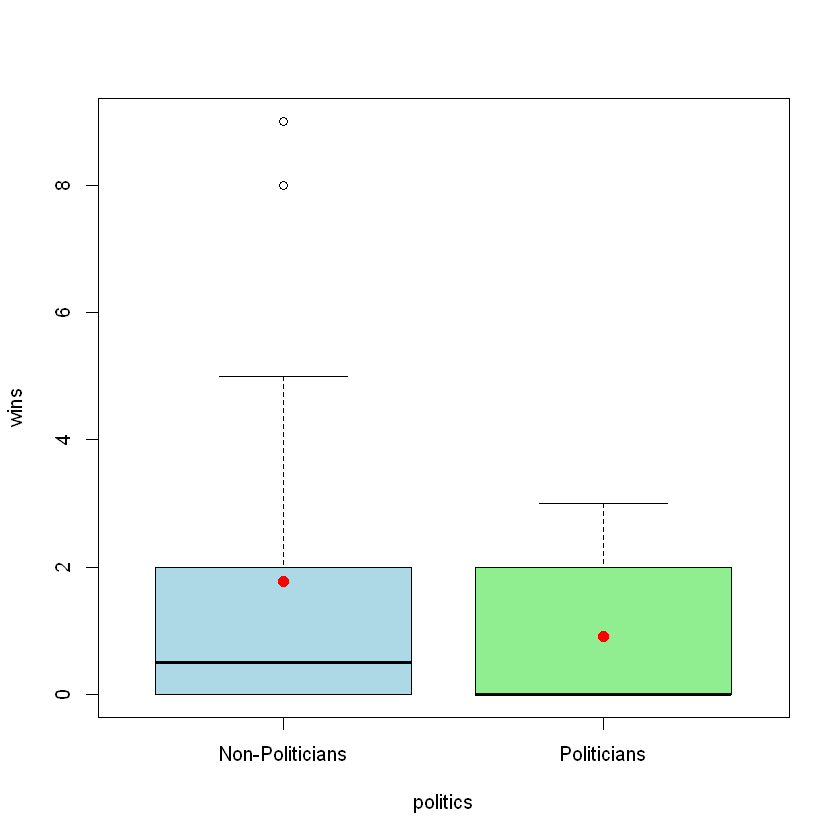

In [67]:
boxplot(wins ~ politics, data = actors,
     names = c("Non-Politicians", "Politicians"),
     col = c("lightblue", "lightgreen"))

points(1:2, tapply(actors$wins, actors$politics, mean), 
col = "red", pch = 19, cex = 1.2)


In the boxplots, we see some difference in the means and medians between the groups. The observed mean (red dots) of awards in the non-politician group appear to be higher. By visual inspection, the data shows non-normality with some extreme outliers.

### Permutation Hypothesis Testing
A t-test is typically used to compare the means of two groups. However, since the sample size is small and violates a key assumption of the t-test, we will run a non-parametric permutation test as an alternative.

### Hypotheses
- $H_0$: There is no significant difference between the average award wins of the two groups.
- $H_1$: There is a significant difference between the average award wins of the two groups.

In [68]:
set.seed(1234)

x <- actors$wins[actors$politics ==0] # actors not in politics
y <- actors$wins[actors$politics ==1] # actors in politics


permu_test <- function(x,y, R){
    z <- c(x, y)
    nx<- length(x)
    n <- length(z)

    diff <- abs(mean(x) - mean(y))

    permuted_diffs <- numeric(R)
    for (i in 1:R){
        k <- sample(1:n, size=nx, replace = FALSE)
        x1 <- z[k]
        y1 <- z[-k]
        permuted_diffs[i] <- abs(mean(x1) - mean(y1))
    }

    p <- mean(permuted_diffs >= diff)

    list(
    observed_diff = diff,
    p_value = p,
    permutation_distribution = permuted_diffs
  )
}


This is a function that implememts a permutation test to compare the difference in **means** between two groups, x (non-politicians) and y (politicians).

The process first assumes the null hypothesis—that there's no real difference between the groups.  Both vectors are pooled into a single dataset, treating all observations as coming from the same population. The observed absolute difference in means between the original  samples groups is calculated which serves as the test statistic for comparison. 
The next step is to simulate 5,000 permutations by randomly shuffling the pooled dataset. In each iteration, a random subset is sampled from the pooled dataset without replacement to form new groups, x1 and y1. The absolute mean difference between these new groups is calculated and stored.

The p-value is calculated as the proportion of permutations where the simulated difference in means is greater than or equal to the observed difference. This p-value quantifies how likely it is to observe a difference as large as the one in the actual data, assuming the null hypothesis is true.

### Result



| Observed_Mean_Difference| P_value|
|------------------------:|-------:|
|                0.8611111|  0.3726|

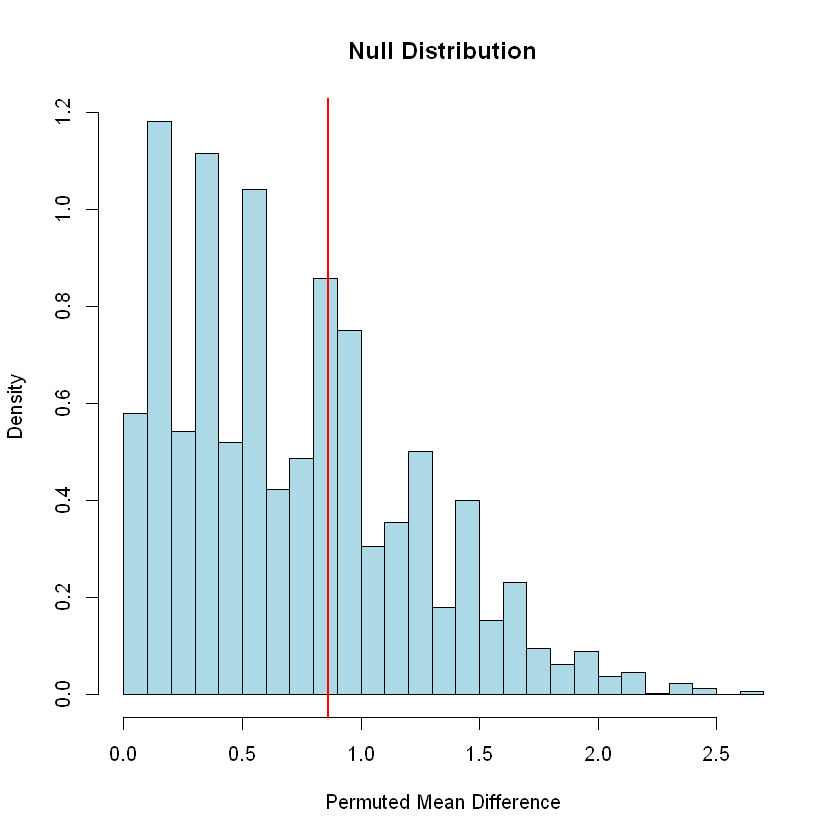

In [76]:
set.seed(1234)
wins <- permu_test(x,y, 5000)

kable(data.frame(
     Observed_Mean_Difference = wins$observed_diff,
     P_value = wins$p_value
))

hist(wins$permutation_distribution, breaks="scott", 
     xlab="Permuted Mean Difference",main="Null Distribution",
     freq= FALSE, col="lightblue")

abline(v = wins$observed_diff, col = "red", lwd = 2)


Since p value exceeds the significant threshold of 0.05 (p=0.3726), there is insufficient evidence to reject the null hypothesis. Hence, we conclude that **there is no significant difference between the means of the two groups**. The null distribution histogram illustrates the distribution of permuted mean differences. The red line marks where the value of the observed mean difference falls. The observed difference sits well within the body of the histogram, suggesting that the observed difference is not unusual compared to what we would expect by random chance (permuted mean differences).

This result suggests that any observed difference in the average number of wins between actors involved in politics and those who are not may simply be due to chance. Based on this test, we have no strong statistical evidence to say that an actor's award count alone does not reliably predict electoral success. It must be noted, however, that this experiment only considered total wins from select award-giving institutions. Other measures of fame and relevant factors such as family political ties or educational background are not accounted for here. We are also limited by a small sample size which may fail to represent the groups well.

Awards may translate to increased public recognition and fame, but also reflect an actor's dedication to their craft. While some actors may use their hard-earned fame to launch political careers, others may want to remain focused on acting, accumulating more accolades. Such divergence in priorities or ambitions may complicate any straightforward relationship between awards and electoral success. Further investigation on other factors is recommended.